In [56]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

import s3dexp.db
import s3dexp.db.utils as dbutils
import s3dexp.db.models as models

In [32]:
num_workers=4
hostname='cloudlet027'

df_all = pd.read_sql(
    'SELECT expname, avg_wall_ms, avg_cpu_ms, avg_mbyteps FROM EurekaExp \
        WHERE ext=%s AND num_workers=%s AND hostname=%s',
    s3dexp.db.engine,
    params=["video", num_workers, hostname])

print df_all

                           expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0               baseline_videodiff     7.184678   27.298126     4.828787
1        baseline_videodiff-oldmse     9.606450   37.720946     3.611457
2   baseline_videodiff-chunksize40     6.918977   26.305847     5.014222
3   baseline_videodiff-chunksize20     7.994453   28.946810     4.339669
4           smart_videodiff-fps480     6.005352   21.002626   460.389297
5           smart_videodiff-fps960     5.899377   20.649518   468.659647
6           smart_videodiff-fps120    10.173541   15.248063   271.763788
7           smart_videodiff-fps240     6.423680   20.963417   430.407523
8        baseline_videodiff-every2     4.718390   15.945754     7.352780
9    smart_videodiff-fps240-every2     5.105991    7.555794   270.798893
10   smart_videodiff-fps480-every2     3.224910    9.499295   428.755149
11   smart_videodiff-fps960-every2     3.024807   10.574585   457.118943
12      baseline_videodiff-every10     2.886707    

['baseline_videodiff-every10', 'smart_videodiff-fps240-every10', 'smart_videodiff-fps480-every10', 'smart_videodiff-fps960-every10']
                         expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0  smart_videodiff-fps240-every2     5.105991    7.555794   270.798893
1  smart_videodiff-fps480-every2     3.224910    9.499295   428.755149
2  smart_videodiff-fps960-every2     3.024807   10.574585   457.118943


<IPython.core.display.Javascript object>


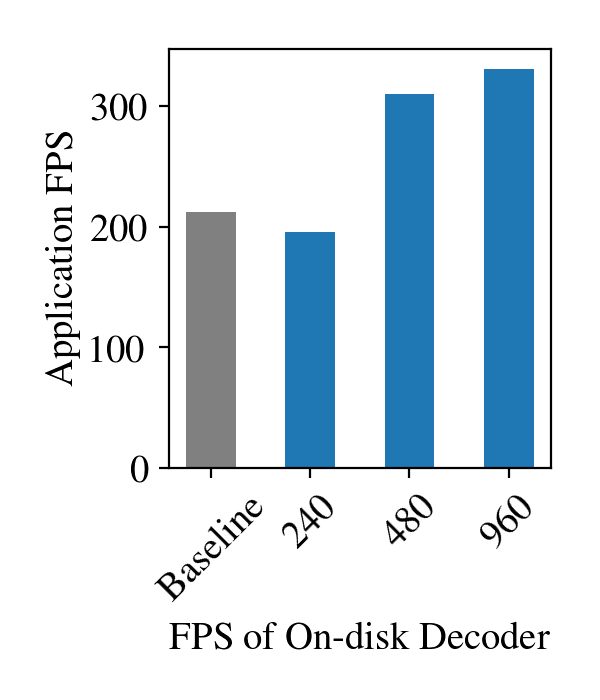

<IPython.core.display.Javascript object>


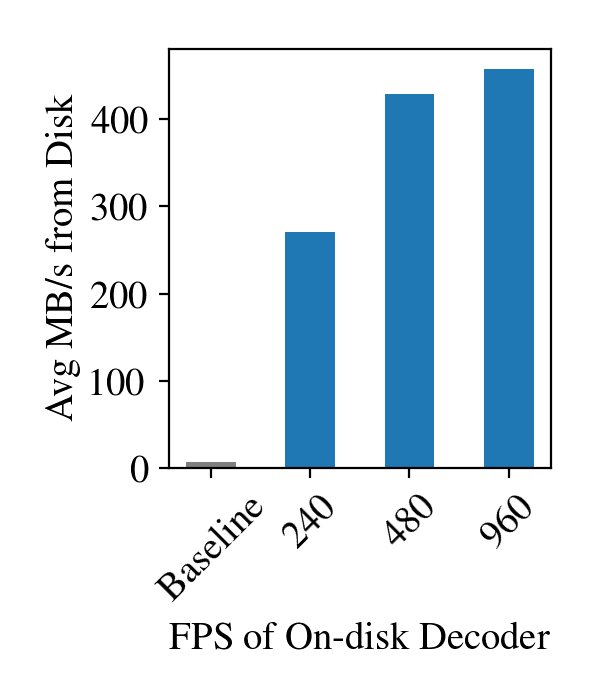

['baseline_videodiff-every10', 'smart_videodiff-fps240-every10', 'smart_videodiff-fps480-every10', 'smart_videodiff-fps960-every10']
                          expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0  smart_videodiff-fps240-every10     4.380050    2.407194    63.136119
1  smart_videodiff-fps480-every10     2.287365    1.650025   120.898658
2  smart_videodiff-fps960-every10     1.234589    1.516158   223.993119


<IPython.core.display.Javascript object>


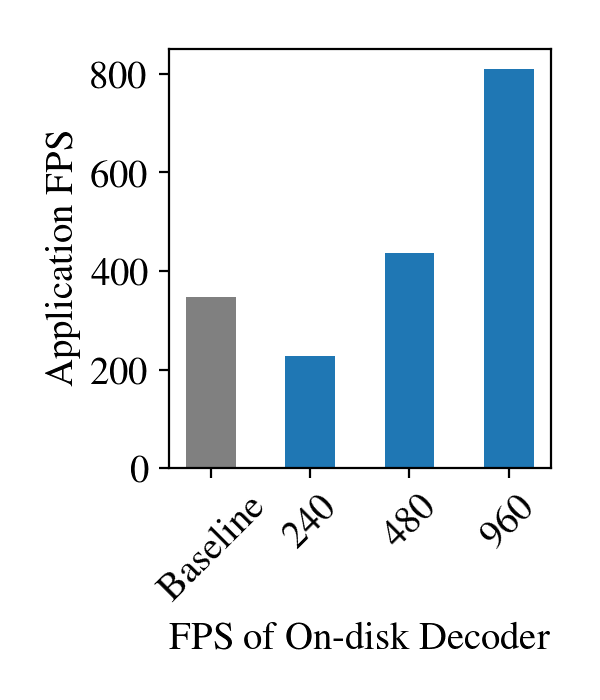

<IPython.core.display.Javascript object>


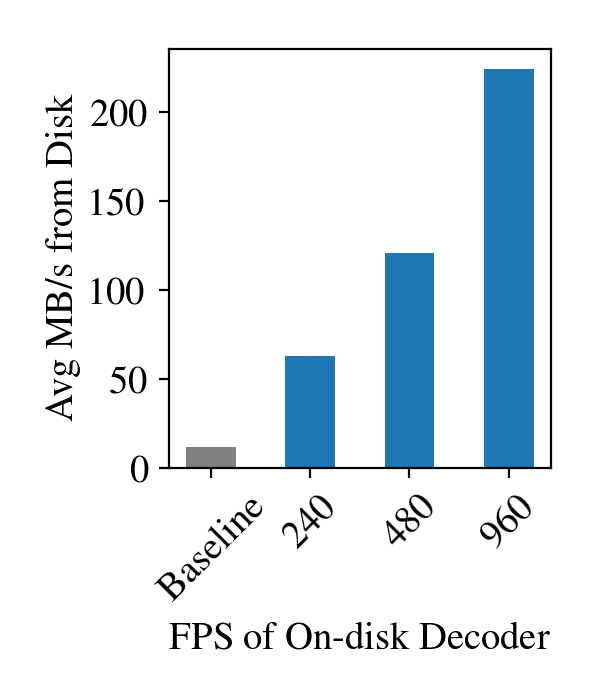

In [58]:
%matplotlib notebook

workload = 'videodiff'

for every_frames in [2, 10]:
        list_fps = [240, 480, 960]
        
        baseline_expname = 'baseline_{}-every{}'.format(workload, every_frames)
        baseline_df = df_all[df_all['expname']==baseline_expname]
            
        smart_expnames = ['smart_{}-fps{}-every{}'.format(workload, fps, every_frames) for fps in list_fps]

        print expnames
        # filter and sort by expnames
        df = pd.concat([df_all[df_all['expname']==el] for el in smart_expnames], ignore_index=True)
        print df

        x = np.arange(len(df))
        width = .5

        # Plot FPS
        fig, ax = plt.subplots(figsize=(3,3.5))
        ax.bar([-1,], 1000./baseline_df['avg_wall_ms'], width, color='gray')
        ax.bar(x, 1000./df['avg_wall_ms'], width) # Throughput
        ax.set_ylabel("Application FPS")
        plt.xticks([-1] + list(x), ['Baseline'] + map(str, list_fps), rotation=45)
        plt.xlabel("FPS of On-disk Decoder")
        
        plt.tight_layout()
        plt.savefig('videodiff-every{}.pdf'.format(every_frames), bbox_inches ='tight')
        
        # Plot bandwidth
        fig, ax = plt.subplots(figsize=(3,3.5))
        ax.bar([-1,], baseline_df['avg_mbyteps'], width, color='gray')
        ax.bar(x, df['avg_mbyteps'], width) # Throughput
        ax.set_ylabel("Avg MB/s from Disk")
        plt.xticks([-1] + list(x), ['Baseline'] + map(str, list_fps), rotation=45)
        plt.xlabel("FPS of On-disk Decoder")
        
        plt.tight_layout()
        plt.savefig('videodiff-every{}-MBps.pdf'.format(every_frames), bbox_inches ='tight')